In [2]:
import numpy as np
import uncertainties as unc
from matplotlib import pyplot as plt
from uncertainties import unumpy as unp
from uncertainties.umath import *
import scipy.odr as odr
from scipy.special import erfinv
import scipy.optimize as op
from scipy.special import erf

In [3]:
def decompose(unparray):
    return np.array([unp.nominal_values(unparray), unp.std_devs(unparray)])

def errorplot(xarray, yarray, xlabel, ylabel):
    xnom, xerr = decompose(xarray)
    ynom, yerr = decompose(yarray)
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.errorbar(xnom, ynom, xerr = xerr, yerr = yerr, fmt = 'o', capsize = 2)
    ax.set_xlabel(xlabel, fontsize = 18)
    ax.set_ylabel(ylabel, fontsize = 18)
    ax.grid(True)
    plt.show()
    return

def findfit(xarray, yarray, func, beta0, showout = False):
    xnom, xerr = decompose(xarray)
    ynom, yerr = decompose(yarray)
    model = odr.Model(func)
    data = odr.RealData(xnom, ynom, sx = xerr, sy = yerr)
    odrfit = odr.ODR(data, model, beta0 = beta0)
    out = odrfit.run()
    if showout:
        out.pprint()
        print(out.sum_square)
    return np.array([out.beta, out.sd_beta])

def errorfitplot(xarray, yarray, xlabel, ylabel, func, fitparam, printmin = False, colors = ['blue', 'red']):
    xnom, xerr = decompose(xarray)
    ynom, yerr = decompose(yarray)
    if xnom[0] <= xnom[-1]:
        fitx = np.linspace(xnom[0]-1, xnom[-1]+1, 500)
    else:
        fitx = np.linspace(xnom[0]+1, xnom[-1]-1, 500)
    fity = func(fitparam, fitx)
    if printmin:
        print(fitx[np.argmin(fity)])
    fig, ax = plt.subplots(figsize = (10, 7))
    ax.errorbar(xnom, ynom, xerr = xerr, yerr = yerr, fmt = 'o', capsize = 2, color = colors[0])
    ax.plot(fitx, fity, color = colors[1])
    ax.set_xlabel(xlabel, fontsize = 16)
    ax.set_ylabel(ylabel, fontsize = 16)
    ax.grid(True)
    plt.show()
    return

def extractparam(param):
    l = []
    for n in range(len(param.T)):
        p = unc.ufloat(param.T[n][0], param.T[n][1])
        l.append(p)
    return l

3A: Focal length

In [36]:
so = unp.uarray([12.5, 20., 40., 60.], np.ones(4)*0.2)
si = unp.uarray([41., 19., 14., 13.], np.ones(4)*0.4)
mag = unp.uarray([3., 1., 0.3, 0.15], np.ones(4)*0.05)

In [5]:
def thinlens(B, x):
    sohat, sihat, f = B
    so = x + sohat
    return so*f/(so-f) - sihat

def thinlens2(B, x):
    f = B[0]
    so = x
    return so*f/(so-f)

In [38]:
param = findfit(so, si, thinlens, [1., 1., 10.], showout = True)

Beta: [-1.24711982 -2.79618164  8.69254678]
Beta Std Error: [ 0.00734538  0.00762367  0.00442065]
Beta Covariance: [[ 0.92278798  0.89200162  0.54306244]
 [ 0.89200162  0.99403512  0.55845373]
 [ 0.54306244  0.55845373  0.33423015]]
Residual Variance: 5.84691701647e-05
Inverse Condition #: 0.00461815215461
Reason(s) for Halting:
  Sum of squares convergence
5.84691701647e-05


In [39]:
param2 = findfit(so, si, thinlens2, [10.], showout = True)

Beta: [ 9.8149875]
Beta Std Error: [ 0.19494768]
Beta Covariance: [[ 0.0055693]]
Residual Variance: 6.8239480293
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
20.4718440879


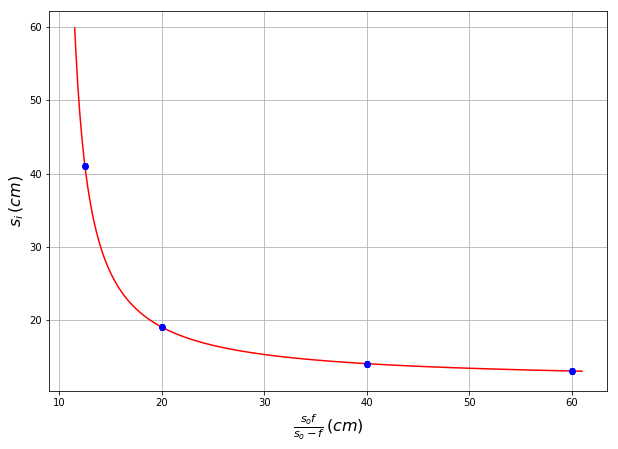

In [40]:
errorfitplot(so, si, r'$\frac{s_of}{s_o - f} \, (cm)$', r'$s_i \, (cm)$', thinlens, param[0])

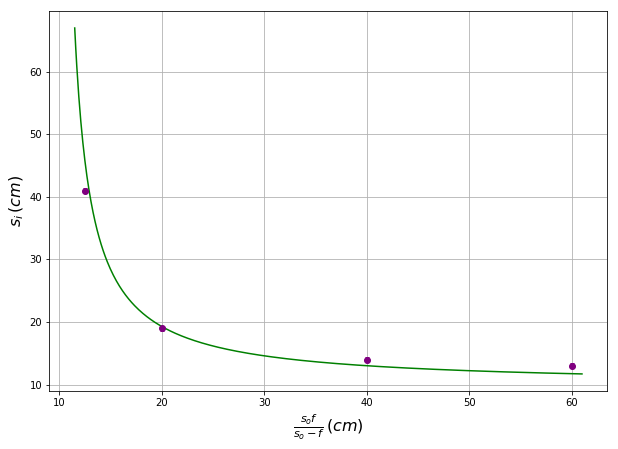

In [41]:
errorfitplot(so, si, r'$\frac{s_of}{s_o - f} \, (cm)$', r'$s_i \, (cm)$', thinlens2, param2[0], colors = ['purple', 'green'])

In [42]:
si/so

array([3.28+/-0.061466660882140006, 0.95+/-0.022141589825484535,
       0.35+/-0.010151970252123478,
       0.21666666666666667+/-0.006705672925420391], dtype=object)

In [13]:
so = unp.uarray([14., 20., 40.5, 59.5], np.ones(4)*0.2)
si = unp.uarray([37.5, 21., 13.5, 11.7], np.ones(4)*0.5)

In [14]:
param = findfit(so, si, thinlens2, [10.], showout = True)

Beta: [ 10.18496362]
Beta Std Error: [ 0.05867213]
Beta Covariance: [[ 0.00629234]]
Residual Variance: 0.547081268245
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
1.64124380474


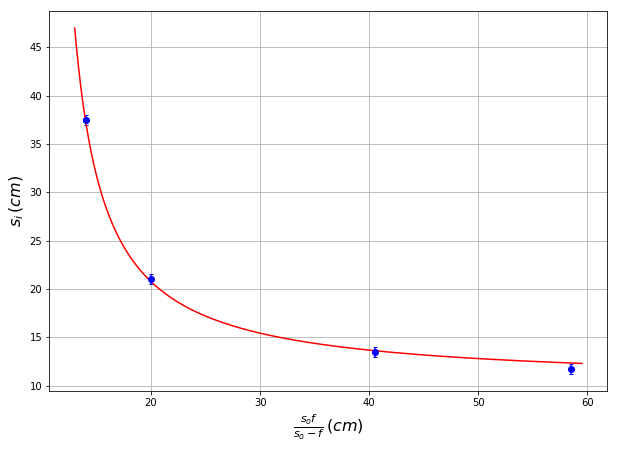

In [9]:
errorfitplot(so, si, r'$\frac{s_of}{s_o - f} \, (cm)$', r'$s_i \, (cm)$', thinlens2, param[0])

In [17]:
so = unp.uarray([13.7, 19.7, 40.2, 59.2], np.ones(4)*0.2)
si = unp.uarray([37.2, 20.7, 13.2, 11.4], np.ones(4)*0.5)
param = findfit(so, si, thinlens2, [10.], showout = True)

Beta: [ 10.01281158]
Beta Std Error: [ 0.06742437]
Beta Covariance: [[ 0.006337]]
Residual Variance: 0.717380889885
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
2.15214266966


In [19]:
f = [10.5, 10.5, 9.5, 9.7, 10.5]
[np.mean(f), np.std(f)]

[10.140000000000001, 0.4454211490264019]

In [20]:
f = [9.87, 10.18, 10.1, 11.5, 10.]
ferr = [1./0.21**2, 1./0.06**2, 1./0.4**2, 1./0.5**2, 1./2.5**2]
np.average(f, weights = ferr)

10.172671129450617

In [23]:
def wmom(arrin, weights_in, inputmean=None, calcerr=False, sdev=False):
    """
    NAME:
      wmom()
      
    PURPOSE:
      Calculate the weighted mean, error, and optionally standard deviation of
      an input array.  By default error is calculated assuming the weights are
      1/err^2, but if you send calcerr=True this assumption is dropped and the
      error is determined from the weighted scatter.

    CALLING SEQUENCE:
     wmean,werr = wmom(arr, weights, inputmean=None, calcerr=False, sdev=False)
    
    INPUTS:
      arr: A numpy array or a sequence that can be converted.
      weights: A set of weights for each elements in array.
    OPTIONAL INPUTS:
      inputmean: 
          An input mean value, around which them mean is calculated.
      calcerr=False: 
          Calculate the weighted error.  By default the error is calculated as
          1/sqrt( weights.sum() ).  If calcerr=True it is calculated as sqrt(
          (w**2 * (arr-mean)**2).sum() )/weights.sum()
      sdev=False: 
          If True, also return the weighted standard deviation as a third
          element in the tuple.

    OUTPUTS:
      wmean, werr: A tuple of the weighted mean and error. If sdev=True the
         tuple will also contain sdev: wmean,werr,wsdev

    REVISION HISTORY:
      Converted from IDL: 2006-10-23. Erin Sheldon, NYU

   """
    
    # no copy made if they are already arrays
    arr = np.array(arrin, ndmin=1, copy=False)
    
    # Weights is forced to be type double. All resulting calculations
    # will also be double
    weights = np.array(weights_in, ndmin=1, dtype='f8', copy=False)
  
    wtot = weights.sum()
        
    # user has input a mean value
    if inputmean is None:
        wmean = ( weights*arr ).sum()/wtot
    else:
        wmean=float(inputmean)

    # how should error be calculated?
    if calcerr:
        werr2 = ( weights**2 * (arr-wmean)**2 ).sum()
        werr = np.sqrt( werr2 )/wtot
    else:
        werr = 1.0/np.sqrt(wtot)

    # should output include the weighted standard deviation?
    if sdev:
        wvar = ( weights*(arr-wmean)**2 ).sum()/wtot
        wsdev = np.sqrt(wvar)
        return wmean,werr,wsdev
    else:
        return wmean,werr

In [145]:
f = [9.87, 10.18, 10.1, 10., 11.5]
ferr = [1./0.21**2, 1./0.06**2, 1./0.4**2, 1./2.5**2, 1./2.**2]
wmom(f, ferr, sdev=True)

(10.156463821645271, 0.057062465966744608, 0.090039368824019819)

3B: Negative lens

In [31]:
def negf(d, f2, si2, so1):
    return (so1*d*(si2 - f2) - so1*f2*si2)/((si2 - f2)*(so1 + d) - f2*si2)

In [38]:
so1 = unc.ufloat(22.8, 0.2)
si2 = unc.ufloat(19, 0.5)
d = unc.ufloat(20., 0.2)
f2 = unc.ufloat(10., 0.01)
negf(d, f2, si2, so1)

-1.168032786885246+/-0.7187512552327088

3C: Beam divergence

In [80]:
def eqn(w, dx):
    d = 1.8
    return erf(d*2**0.5/w) - 2*erf(dx*2**0.5/w)

def spotsize(dxvec, x1 = 0.00001, x2 = 3):
    wvec = []
    for dx in dxvec:
        w = op.brentq(eqn, x1, x2, args=(dx))
        wvec.append(w)
    wvec = unp.uarray(wvec, np.ones(len(wvec))*0.05)
    return wvec

def parabola(B, x):
    a, b, c = B
    return a*x**2 + b*x + c

def div(B, z):
    th = B[0]
    D0, z0 = 0.68, 432
    return (D0**2 + (2*th*(z-z0))**2)**0.5

def linear(B, x):
    return B[0]*x

In [41]:
x1 = np.array([15.3, 15.40, 12.82, 15.36, 14.52])
x2 = np.array([15.43, 15.52, 12.93, 15.48, 14.67])
z = unp.uarray([155, 205, 357, 460, 915], np.ones(5)*50)
dx = np.abs(x1-x2)
wvec = spotsize(dx)

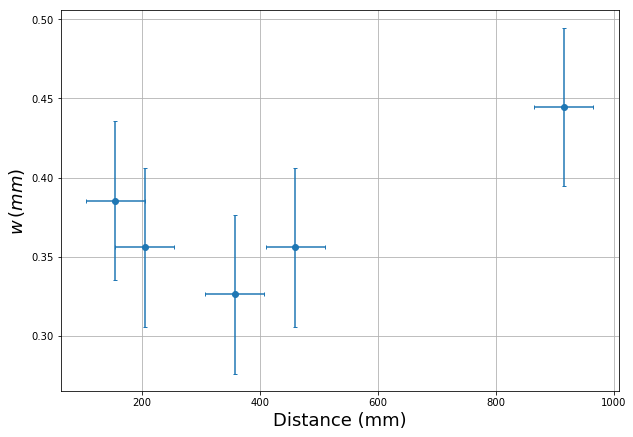

In [42]:
errorplot(z, wvec, 'Distance (mm)', r'$w \, (mm)$')

In [43]:
param = findfit(z, wvec, parabola, [1., 1., 1.], showout = True)

Beta: [  4.56392584e-07  -3.94683578e-04   4.25354810e-01]
Beta Std Error: [  1.44282210e-07   1.59666686e-04   3.37770260e-02]
Beta Covariance: [[  1.55710782e-13  -1.68750326e-10   3.23333954e-08]
 [ -1.68750326e-10   1.90687286e-07  -3.82156515e-05]
 [  3.23333954e-08  -3.82156515e-05   8.53367175e-03]]
Residual Variance: 0.133692450463
Inverse Condition #: 6.69705919823e-07
Reason(s) for Halting:
  Sum of squares convergence
0.267384900925


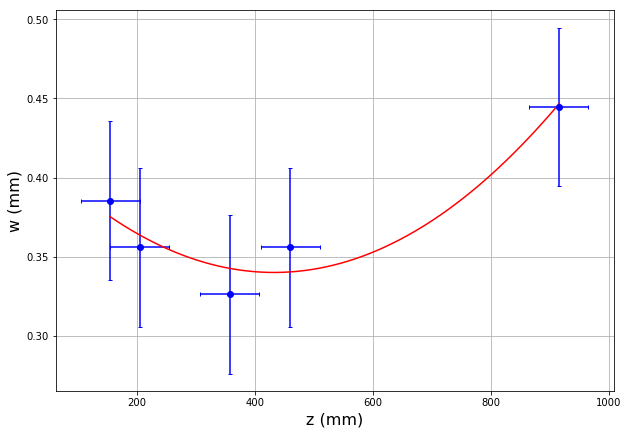

In [44]:
errorfitplot(z, wvec, 'z (mm)', 'w (mm)', parabola, param[0], printmin = False)

In [45]:
a, b, c = extractparam(param)
w0 = parabola(extractparam(param), -b/(2*a))
z0 = unc.ufloat(432, 40)

In [55]:
2*w0

0.6800504859502189+/-0.1629106437442664

In [47]:
z = unp.uarray([2230, 2680, 3275, 3400, 4300], np.ones(5)*50)
x21 = np.array([16.33, 16.08, 12.91, 11.10, 11.30])
x22 = np.array([16.78, 15.59, 13.45, 11.70, 11.97])
dx2 = np.abs(x21 - x22)
wvec = spotsize(dx2)

In [60]:
dx2

array([ 0.45,  0.49,  0.54,  0.6 ,  0.67])

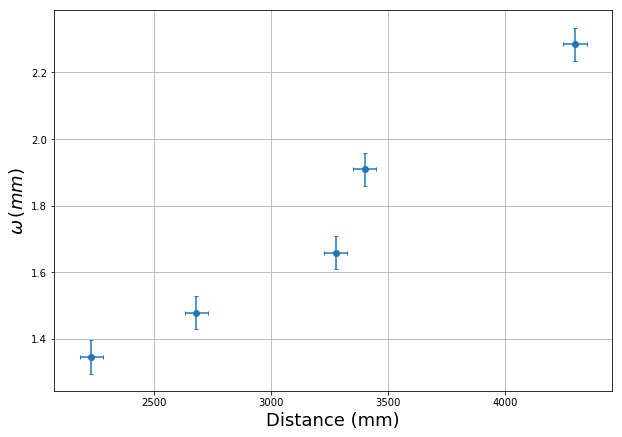

In [49]:
wvec = spotsize(dx2)
errorplot(z, wvec, 'Distance (mm)', r'$\omega \, (mm)$')

In [50]:
yaxis = unp.sqrt(4*wvec**2 - 4*w0**2)
xaxis = (z - z0)
param2 = findfit(xaxis, yaxis, linear, [0.0005], showout = True)

Beta: [ 0.00122141]
Beta Std Error: [  4.21425521e-05]
Beta Covariance: [[  4.35445265e-10]]
Residual Variance: 4.07857161203
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
16.3142864481


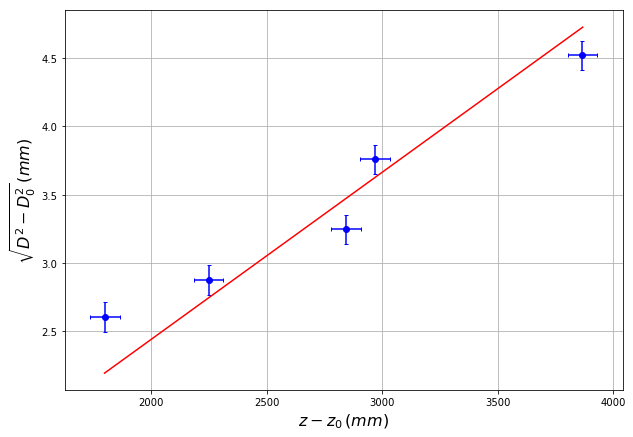

In [51]:
errorfitplot(xaxis, yaxis, r'$z - z_0 \, (mm)$', r'$\sqrt{D^2 - D_0^2} \, (mm)$', linear, param2[0], printmin = False)

In [57]:
2*632.8e-9/(np.pi*w0*1e-3)*1000

1.1847737786447083+/-0.2838204853285926

Galilean expander

In [124]:
z = unp.uarray([320, 655, 690, 805, 1030], np.ones(5)*50)
x1 = np.array([14.73, 14.14, 12.51, 15.10, 14.45])
x2 = np.array([15.02, 14.40, 12.78, 15.39, 14.75])
dx = np.abs(x1-x2)
wvec = spotsize(dx)
param = findfit(z, wvec, parabola, [1., 1., 1.], showout = True)

Beta: [  6.14666631e-07  -7.60095635e-04   1.03435056e+00]
Beta Std Error: [  2.88713939e-07   3.86993456e-04   1.22862513e-01]
Beta Covariance: [[  1.67076853e-13  -2.19803949e-10   6.38510677e-08]
 [ -2.19803949e-10   3.00184335e-07  -9.16512315e-05]
 [  6.38510677e-08  -9.16512315e-05   3.02565616e-02]]
Residual Variance: 0.498906562067
Inverse Condition #: 2.19182524695e-07
Reason(s) for Halting:
  Sum of squares convergence
0.997813124135


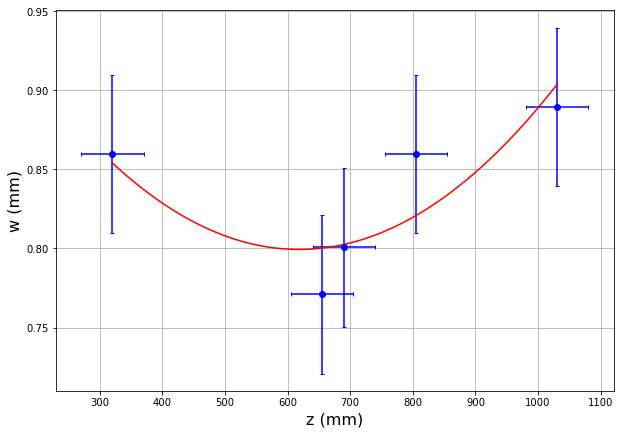

In [125]:
errorfitplot(z, wvec, 'z (mm)', 'w (mm)', parabola, param[0], printmin = False)

In [122]:
a, b, c = extractparam(param)
w0 = parabola(extractparam(param), -b/(2*a))

In [126]:
-b/(2*a)

618.2990879426337+/-428.30194742371765

In [135]:
z = unp.uarray([5.5, 8.5, 13, 25.5, 30.5], np.ones(5)*0.2)*10
x1 = np.array([14.83, 12.92, 12.91, 14.15, 14.55])
x2 = np.array([15.07, 12.76, 12.95, 14.50, 15.0])
dx = np.abs(x1-x2)
wvec = spotsize(dx)
param = findfit(z, wvec, parabola, [1., 1., 1.], showout = True)

Beta: [  5.03203768e-05  -1.48226245e-02   1.33471014e+00]
Beta Std Error: [  1.81249001e-05   6.57047279e-03   4.51874970e-01]
Beta Covariance: [[  2.18055667e-11  -7.81486089e-09   4.97768270e-07]
 [ -7.81486089e-09   2.86555915e-06  -1.88634678e-04]
 [  4.97768270e-07  -1.88634678e-04   1.35535389e-02]]
Residual Variance: 15.0655109408
Inverse Condition #: 4.24064371548e-06
Reason(s) for Halting:
  Sum of squares convergence
30.1310218816


In [136]:
a, b, c = extractparam(param)
w0 = parabola(extractparam(param), -b/(2*a))

In [137]:
w0

0.24315334483349416+/-1.1380887219802291

In [138]:
z0 = -b/(2*a)

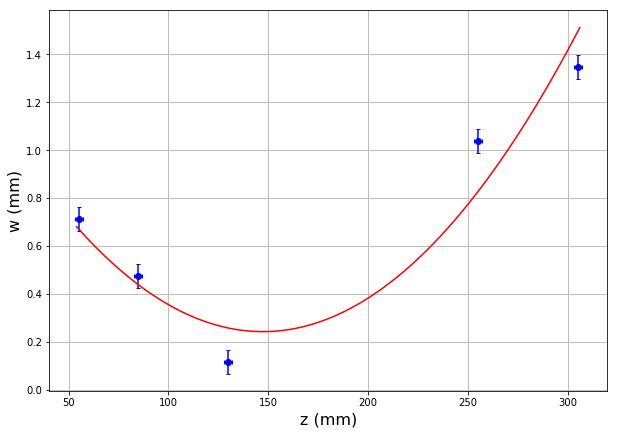

In [139]:
errorfitplot(z, wvec, 'z (mm)', 'w (mm)', parabola, param[0], printmin = False)

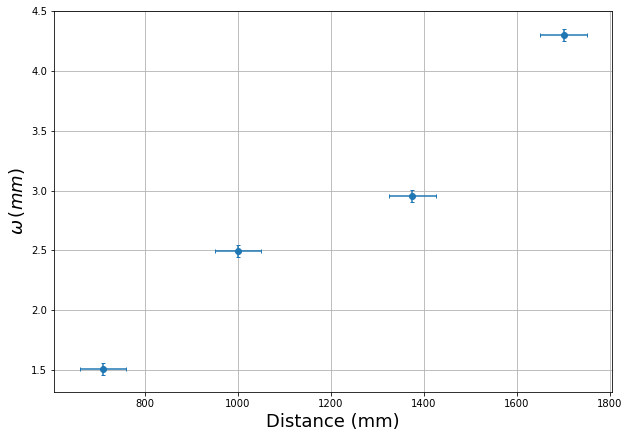

In [142]:
z = unp.uarray([710, 1000, 1375, 1700], np.ones(4)*50)
dx = np.array([0.5, 0.7, 0.75, 0.825])
wvec = spotsize(dx, x1 = 0.0001, x2 = 5)
errorplot(z, wvec, 'Distance (mm)', r'$\omega \, (mm)$')

In [143]:
yaxis = unp.sqrt(4*wvec**2 - 4*w0**2)
xaxis = (z - z0)
param2 = findfit(xaxis, yaxis, linear, [0.0005], showout = True)

Beta: [ 0.00536256]
Beta Std Error: [ 0.00021833]
Beta Covariance: [[  6.42756087e-08]]
Residual Variance: 0.741650223392
Inverse Condition #: 1.0
Reason(s) for Halting:
  Sum of squares convergence
2.22495067018


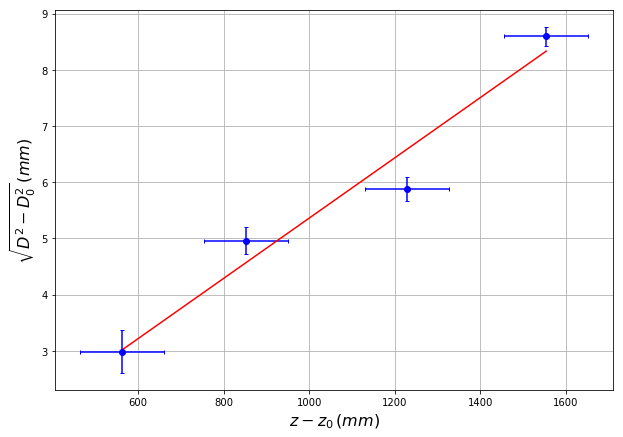

In [144]:
errorfitplot(xaxis, yaxis, r'$z - z_0 \, (mm)$', r'$\sqrt{D^2 - D_0^2} \, (mm)$', linear, param2[0], printmin = False)

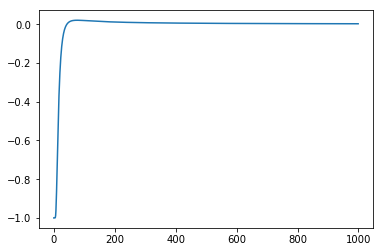

In [104]:
plt.plot(eqn(np.linspace(0.0001, 100, 1000), 0.825))
plt.show()

In [115]:
z = unp.uarray([50., 100., 200., 250.], np.ones(4)*50)
x1 = np.array([12.99, 14.64, 11.32, 10.95])
x2 = np.array([12.67, 14.93, 10.99, 11.25])
dx = np.abs(x1-x2)
wvec = spotsize(dx)
param = findfit(z, wvec, parabola, [1., 1., 1.], showout = True)
a, b, c = extractparam(param)
w0 = parabola(extractparam(param), -b/(2*a))

Beta: [  5.83110130e-04  -1.74732322e-01   1.07288638e+01]
Beta Std Error: [  2.86316209e-02   8.58941125e+00   4.83176987e+02]
Beta Covariance: [[  8.19596712e-04  -2.45875450e-01   1.38305149e+01]
 [ -2.45875450e-01   7.37624158e+01  -4.14922157e+03]
 [  1.38305149e+01  -4.14922157e+03   2.33410732e+05]]
Residual Variance: 1.00021107986
Inverse Condition #: 1.23757954111e-07
Reason(s) for Halting:
  Iteration limit reached
1.00021107986


In [118]:
dx

array([ 0.32,  0.29,  0.33,  0.3 ])